# Using Basemaps

Creating geospatial visualizations oftern require overlaying your data on a basemap. [Contextily](https://contextily.readthedocs.io/en/latest/) is a package that allows you to fetch various basemaps from the internet and ad them to your plot as static images.

We will learn how to take a shapefile showing the path of the [2017 Solar Eclipse](https://svs.gsfc.nasa.gov/4518) and create a map with a topographic map. 

In [1]:
import contextily as cx
import geopandas as gpd
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_pkg_path = 'data'
folder = 'eclipse'
upath_file = os.path.join(data_pkg_path, folder, 'upath17.shp')
path_gdf = gpd.read_file(upath_file)

We can show the GeoDataFrame using the `plot()` method.

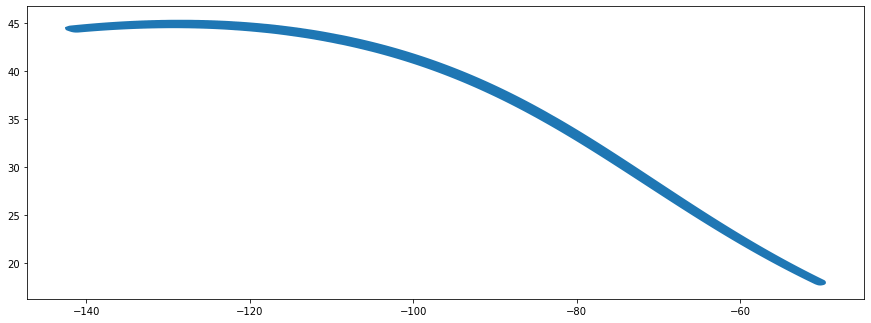

In [3]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax)
plt.show()

The visualization is not useful as it is missing context. We want to overlay this on a basemap to understand where the eclipse was visible from. We can choose from a variety of basemap tiles. There are over 200 basemap styles included in the library. Let's see them using the `providers` property.

In [20]:
providers = cx.providers

For overlaying the eclipse path, let's use the *OpenTopoMap* basemap. We need to specify a CRS for the map. For now, let's use the CRS of the original shapefile.

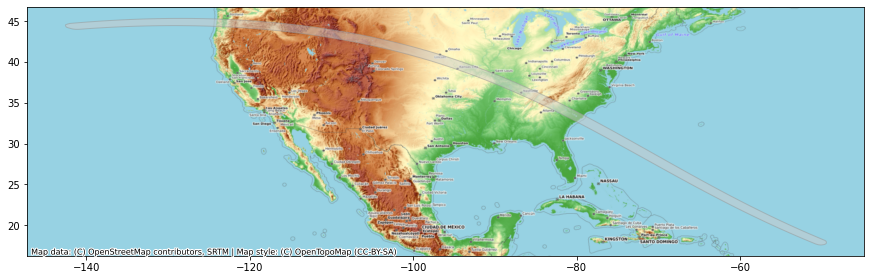

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)

cx.add_basemap(ax, crs=path_gdf.crs, source=cx.providers.OpenTopoMap)
plt.show()

The web tiles for the basemap are in the Web Mercator CRS (EPSG:3857). When you request them in a different CRS, they are warped to the requested CRS. This may cause the labels to not be legible in some cases. Instead, we can request the tiles in their original CRS and reproject our data layer to its CRS.

In [ ]:
path_reprojected = path_gdf.to_crs('epsg:3857')
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)

cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.OpenTopoMap)
ax.set_axis_off()
plt.title('2017 Total Solar Eclipse Path', size = 18)

output_folder = 'output'
output_path = os.path.join(output_folder, 'eclipse_path.png')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Instead of the OpenTopoMap, create a visualization using the *Toner* basemap from *Stamen*.

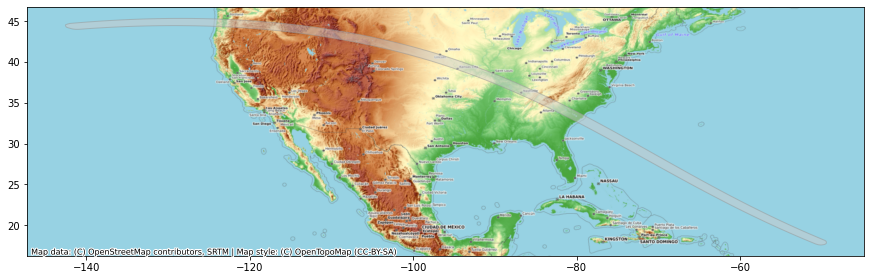

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)

cx.add_basemap(ax, crs=path_gdf.crs, source=cx.providers.OpenTopoMap)
plt.show()